In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../data/processed/toxicity_analysis_perspective.csv")

In [3]:
print(data.columns)

Index(['id', 'search_tag', 'create_time', 'video_desc', 'stickers_on_video',
       'video_hashtags', 'video_duration_in_sec', 'is_duet_enabled',
       'duet_from_id', 'music_id', 'music_title', 'music_url', 'music_author',
       'music_is_original_audio', 'digg_count', 'share_count', 'comment_count',
       'play_count', 'author_unique_id', 'author_nickname', 'author_avatar',
       'author_signature', 'author_is_verified', 'author_duet_setting',
       'author_following_count', 'author_followers_count',
       'author_heart_count', 'author_digg_count', 'author_heart', 'video_path',
       'video_url', 'transcription', 'video_contains_music',
       'video_contains_male', 'video_contains_female', 'video_contains_noise',
       'video_contains_no_energy', 'segments', 'total_music_duration',
       'percentage_of_video_made_of_music', 'full_text', 'toxicity',
       'severe_toxicity', 'identity_attack', 'insult', 'profanity', 'threat'],
      dtype='object')


In [4]:
selected_columns = ['id',
                    'search_tag',
                    'create_time',
                    'digg_count',
                    'share_count',
                    'comment_count',
                    'play_count',
                    'transcription',
                    'full_text',
                    'toxicity',
                    'severe_toxicity',
                    'identity_attack',
                    'insult',
                    'profanity',
                    'threat']

data_filtered = data[selected_columns].copy()

In [5]:
data_filtered.head()

id search_tag                create_time  digg_count   
0  6746590978280279301   joebiden  2019-10-11 12:58:42-04:00      196700  \
1  6748582567995378949       maga  2019-10-16 21:47:08-04:00      498000   
2  6752944407395175686  trump2020  2019-10-28 15:53:18-04:00      219000   
3  6755172553632926981  trump2020  2019-11-03 14:59:36-05:00      213600   
4  6758547542276852998       maga  2019-11-12 17:16:18-05:00      243300   

   share_count  comment_count  play_count   
0         5215           1447      988000  \
1        43200           5405     4000000   
2        16700           8276     2600000   
3        34300           6718     1400000   
4        19100           1928     1900000   

                                       transcription   
0  Do you know what Dab Me Up is? Do you know wha...  \
1  Go ahead, go ahead. No, not you, not you. Your...   
2                                   There's not any.   
3  If I give you one message to hold in your hear...   
4    What? Did I kill them, sir? Are you kidding me?   

                                           full_text  toxicity   
0  so the former vice president and i are best bu...  0.323975  \
1  “your organization is terrible” #maga #fyp go ...  0.421296   
2  the hat didn’t fit, but can the vid go viral s...  0.091913   
3  keep america great #donaldtrump #trump2020 #tr...  0.023435   
4  #trump2020 #foryourpage #maga #maga #kag what?...  0.397214   

   severe_toxicity  identity_attack    insult  profanity    threat  
0         0.020903         0.031207  0.249285   0.192787  0.034768  
1         0.014124         0.027012  0.441265   0.078055  0.011405  
2         0.003414         0.009767  0.026445   0.025634  0.011612  
3         0.001364         0.004736  0.010857   0.012620  0.007521  
4         0.023787         0.044355  0.083853   0.162177  0.519571

#### Split data in Toxic and Non-Toxic videos

In [6]:
# Create a subset of non-toxic videos
non_toxic_videos = data_filtered[data_filtered['toxicity'] < 0.7]

# Create a subset of toxic videos
toxic_videos = data_filtered[data_filtered['toxicity'] >= 0.7]

In [7]:
print('Number of toxic videos = ', toxic_videos.shape[0], '\n')
print('Number of non-toxic videos = ', non_toxic_videos.shape[0])

Number of toxic videos =  95 

Number of non-toxic videos =  1057


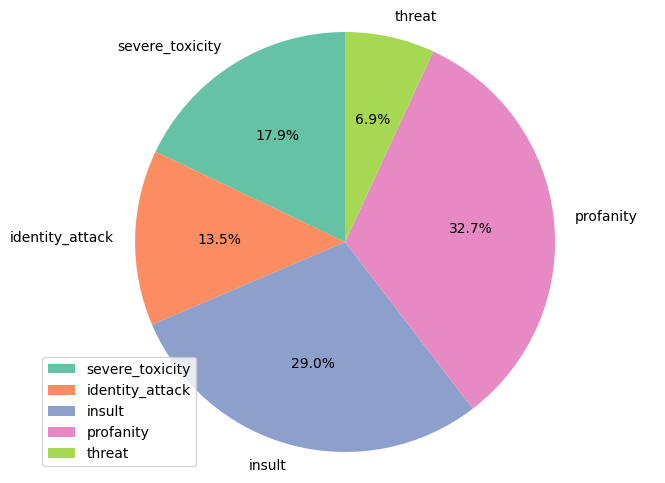

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns representing different types of toxicity
toxicity_columns = ['severe_toxicity', 'identity_attack', 'insult', 'profanity', 'threat']

# Create a DataFrame with the sum of each toxicity type
toxicity_counts = toxic_videos[toxicity_columns].sum()

# Plot the pie chart using seaborn
plt.figure(figsize=(8, 6))
sns.set_palette('Set2')  # Set color palette
toxicity_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.axis('equal')  # Ensure pie is drawn as a circle
plt.legend(labels=toxicity_counts.index, loc='lower left')
plt.show()

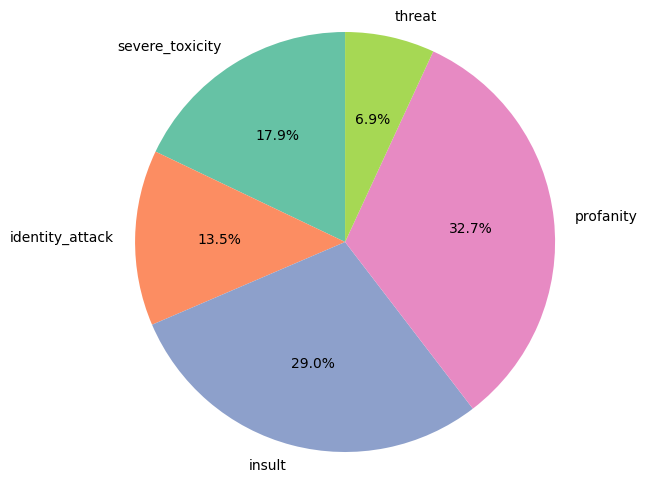

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns representing different types of toxicity
toxicity_columns = ['severe_toxicity', 'identity_attack', 'insult', 'profanity', 'threat']

# Create a DataFrame with the sum of each toxicity type
toxicity_counts = toxic_videos[toxicity_columns].sum()

# Plot the pie chart using seaborn
plt.figure(figsize=(8, 6))
sns.set_palette('Set2')  # Set color palette
toxicity_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.axis('equal')  # Ensure pie is drawn as a circle
plt.legend().remove()  # Remove the legend
plt.show()

In [18]:
for column in toxicity_columns:
    max_toxicity = toxic_videos[column].max()  # Maximum toxicity score in the column
    max_toxicity_text = toxic_videos.loc[toxic_videos[column] == max_toxicity, 'full_text'].values[0]
    print(f"Highest toxicity in {column}: {max_toxicity:.2f}")
    print(f"Corresponding text: {max_toxicity_text}\n")

Highest toxicity in severe_toxicity: 0.64
Corresponding text: #republicanparty2020 stop leaving this shit on my porch and mailbox. #biden2020 #trumpisadisgrace get the fuck off my porch! get your ass off this motherfucking porch bitch! trump supporter leaving flyers on my porch😡

Highest toxicity in identity_attack: 0.72
Corresponding text: someone find him!! he’s under the trump and biden tag!! #fyp #foryoupage #foryou #ohno #tiktok #trending #trump2020 #biden2020 #xyzbca #fyp #fyp #fyp do you want to say that again? white power. what was that? you're going to go on tiktok for this. oh, yes, you're going to record me? yes. yes. yes. yes. do record me. yes, please. okay. i hate niggers. i hate kites. i hate every shit skin that lives in america. you don't belong here. go back to your shitty country. tiktok do your job
find this man

Highest toxicity in insult: 0.81
Corresponding text: #republicanparty2020 stop leaving this shit on my porch and mailbox. #biden2020 #trumpisadisgrace get 

In [38]:
import pandas as pd

# Initialize an empty list to store the output
output_data = []

# Iterate over the toxicity columns
for column in toxicity_columns:
    max_toxicity = toxic_videos[column].max()  # Maximum toxicity score in the column
    max_toxicity_text = toxic_videos.loc[toxic_videos[column] == max_toxicity, 'full_text'].values[0]
    output_data.append([column, max_toxicity, max_toxicity_text])

# Create a DataFrame from the output data
output_df = pd.DataFrame(output_data, columns=["Toxicity Column", "Toxicity Score", "Corresponding Text"])

# Save the DataFrame as an Excel file
output_df.to_excel("../figures/toxicity_output.xlsx", index=False)

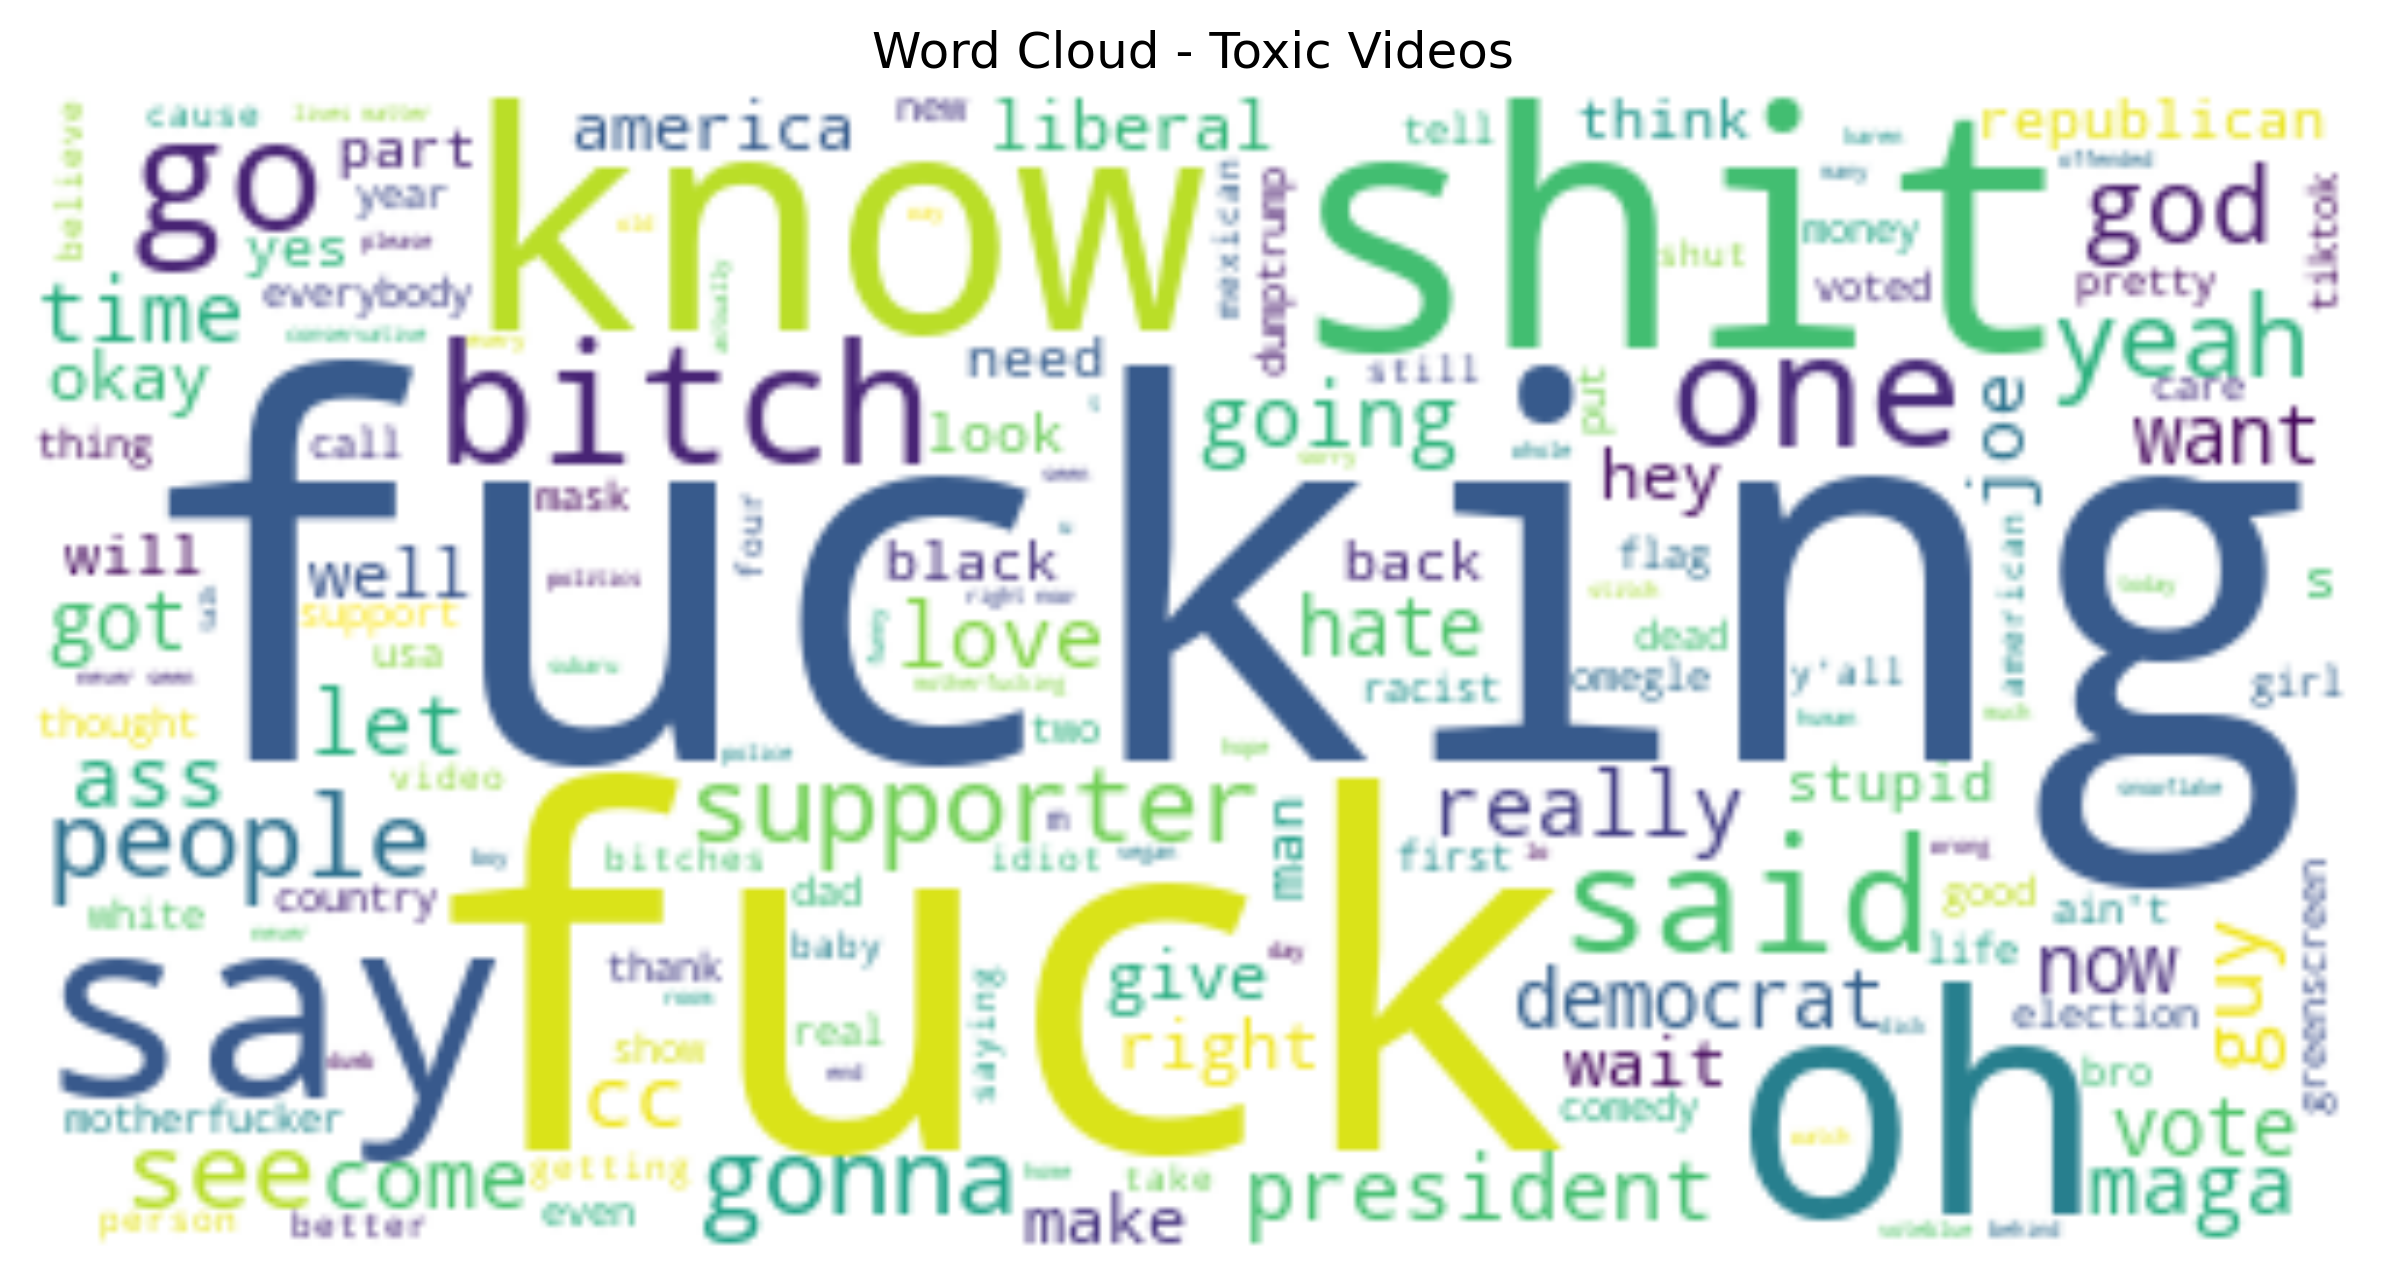

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Convert 'full_text' column to a single string for toxic videos
toxic_text = ' '.join(toxic_videos['description']).join(toxic_videos['stickers']).join(toxic_videos['transcription'])

# Generate word cloud for toxic videos with white background
wordcloud_toxic = WordCloud(stopwords=STOPWORDS.union(['fyp', 'foryoupage', 'foryou', 'donald', 'trump', 'biden', 'biden2020', 'trump2020']), background_color='white')

# Generate the word cloud
wordcloud_toxic.generate(toxic_text)

# Plot the word cloud with higher quality
plt.figure(figsize=(10, 7), dpi=300)
plt.imshow(wordcloud_toxic, interpolation='bilinear')
plt.axis('off')

# Save the word cloud with higher quality
plt.savefig('../figures/wordcloud_toxic.png', dpi=300)


#### top 10 most toxic videos and top 10 least toxic videos

In [22]:
sorted_df = data_filtered.sort_values(by='toxicity', ascending=False)

top_10_toxic_df = sorted_df.head(10).copy()
lowest_10_toxic_df = sorted_df.tail(10).copy()

In [19]:
for i in range(len(top_10_toxic_df)):
    print(top_10_toxic_df.iloc[i]['full_text'], '\n')
    print(top_10_toxic_df.iloc[i]['toxicity'], '\n')

#republicanparty2020 stop leaving this shit on my porch and mailbox. #biden2020 #trumpisadisgrace get the fuck off my porch! get your ass off this motherfucking porch bitch! trump supporter leaving flyers on my porch😡 

0.95048624 

no karen, fuck you!  #fyp #triggered #dumbassliberal #goodtimes #trumpsupporter #trump2020 #maga #kag #proudamerican well, tiktok, i just came out of walmart and apparently i'm parked right next to that bitch karen that everybody speaks of. i'm guessing my hat triggered her because i shit you not, she walks by me and yells, fuck trump. yeah, one of those. but, it turns out i ordered an extra couple of these just for this kind of occasion, so... no, karen. fuck you.  

0.944597 

he aggravate me #trump2020 #fyp #foryou #blacklivesmatter #blmmovement #twooptions i don't know why the fuck he walked away like he did some shit bitch you didn't do shit the fact that you're depressed ass old white motherfucking orange blob self can't even sit down once once mother

In [23]:
for i in range(len(lowest_10_toxic_df)):
    print(lowest_10_toxic_df.iloc[i]['full_text'], '\n')
    print(lowest_10_toxic_df.iloc[i]['toxicity'], '\n')

keep america great #donaldtrump #trump2020 #trump #trumptrain #inspration 🦅🇺🇸trump 2020🇺🇸🦅 if i give you one message to hold in your hearts today, it's this. treat the word impossible as nothing more than motivation. relish the opportunity to be an outsider because it's the outsiders who change the world and who make a real and lasting difference. trump 20 20 

0.02343543 

follow for more!! #trump #america #fyp #usa #impression #trumpimpression #president #politicalhumor this is donald trump's response to somebody asking him what day it is. they could be wednesday. i love wednesday. donald trump responds 
to “what day is it?” 

0.022374803 

#greenscreen trump 2020!🙏🤞 #trump #trumpsquad2020 #trump2020 #votered if i give you one message to hold in your hearts today, it's this. treat the word impossible as nothing more than motivation. relish the opportunity to be an outsider because it's the outsiders who change the world and who make a real and lasting difference. if trump doesen’t wi

#### average toxicity per search tag (hashtag)

In [25]:
average_toxicity_hashtag = data_filtered.groupby('search_tag')['toxicity'].mean()

print(average_toxicity_hashtag.sort_values(ascending=False))

search_tag
trump2020    0.345719
trump        0.341684
maga         0.336119
biden2020    0.321675
democrats    0.302863
joebiden     0.287763
Name: toxicity, dtype: float64


#### vs Average toxicity top 10 toxic videos per hashtag

In [26]:
top_10_toxic_videos_per_hashtag = data_filtered.sort_values('toxicity', ascending=False).groupby('search_tag').head(10)
average_toxicity_hashtag = top_10_toxic_videos_per_hashtag.groupby('search_tag')['toxicity'].mean()

print(average_toxicity_hashtag.sort_values(ascending=False))

search_tag
biden2020    0.889778
trump        0.872707
trump2020    0.866787
maga         0.816078
democrats    0.752750
joebiden     0.649500
Name: toxicity, dtype: float64


#### Distribution of toxicity for each hashtag

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

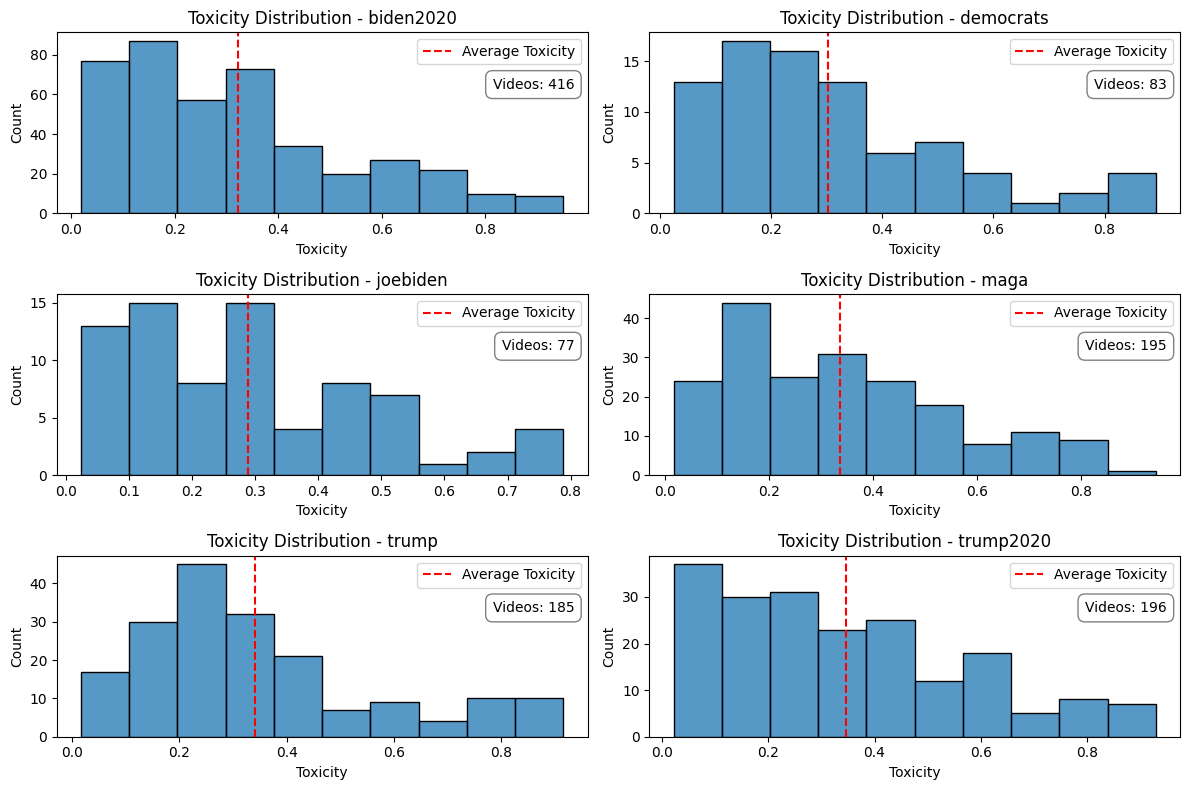

In [43]:
# Group the DataFrame by 'search_tag' and select the 'toxicity' column
grouped_data = data_filtered.groupby('search_tag')['toxicity']

# Calculate the number of rows and columns for the grid
n_rows = 3
n_cols = 2

# Create the figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

# Iterate over each group and plot the distribution of toxicity
for (group_name, group_data), ax in zip(grouped_data, axes.flatten()):
    sns.histplot(group_data, bins=10, kde=False, ax=ax)  # Plot the distribution using histplot
    avg_toxicity = group_data.mean()  # Calculate the average toxicity
    ax.axvline(avg_toxicity, color='red', linestyle='dashed', label='Average Toxicity')  # Add dashed red line for average
    ax.set_title(f'Toxicity Distribution - {group_name}')  # Set the title
    ax.set_xlabel('Toxicity')  # Set the x-axis label
    ax.set_ylabel('Count')  # Set the y-axis label
    ax.legend()  # Show the legend

    # Add a box/legend showing the total number of videos
    num_videos = len(group_data)
    box_text = f'Videos: {num_videos}'
    ax.text(0.975, 0.75, box_text, transform=ax.transAxes, ha='right', va='top',
            bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

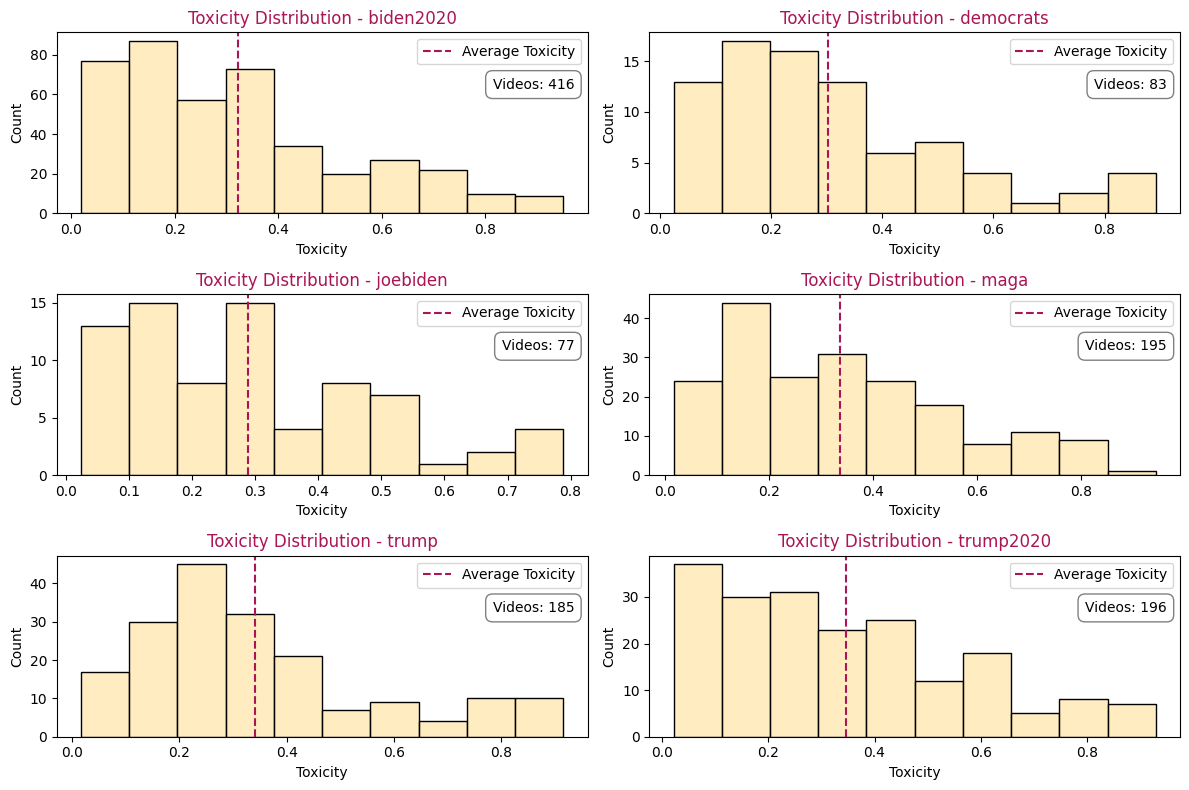

In [79]:
# Group the DataFrame by 'search_tag' and select the 'toxicity' column
grouped_data = data_filtered.groupby('search_tag')['toxicity']

# Calculate the number of rows and columns for the grid
n_rows = 3
n_cols = 2

# Create the figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

# Set the color palette using the university theme colors
colors = ['#FFE6AB', '#F3965E', '#AA1555', '#6E3B23', '#24A793', '#5287C6', '#001240', '#5B2182']
sns.set_palette(colors)

# Iterate over each group and plot the distribution of toxicity
for (group_name, group_data), ax in zip(grouped_data, axes.flatten()):
    sns.histplot(group_data, bins=10, kde=False, ax=ax)  # Plot the distribution using histplot
    avg_toxicity = group_data.mean()  # Calculate the average toxicity
    ax.axvline(avg_toxicity, color='#AA1555', linestyle='dashed', label='Average Toxicity')  # Add dashed line for average
    ax.set_title(f'Toxicity Distribution - {group_name}', color='#AA1555')  # Set the title
    ax.set_xlabel('Toxicity', color='#000000')  # Set the x-axis label
    ax.set_ylabel('Count', color='#000000')  # Set the y-axis label
    ax.legend()  # Show the legend

    # Add a box/legend showing the total number of videos
    num_videos = len(group_data)
    box_text = f'Videos: {num_videos}'
    ax.text(0.975, 0.75, box_text, transform=ax.transAxes, ha='right', va='top',
            bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### Visualization of toxic comment for each search_tag

In [47]:
from wordcloud import WordCloud

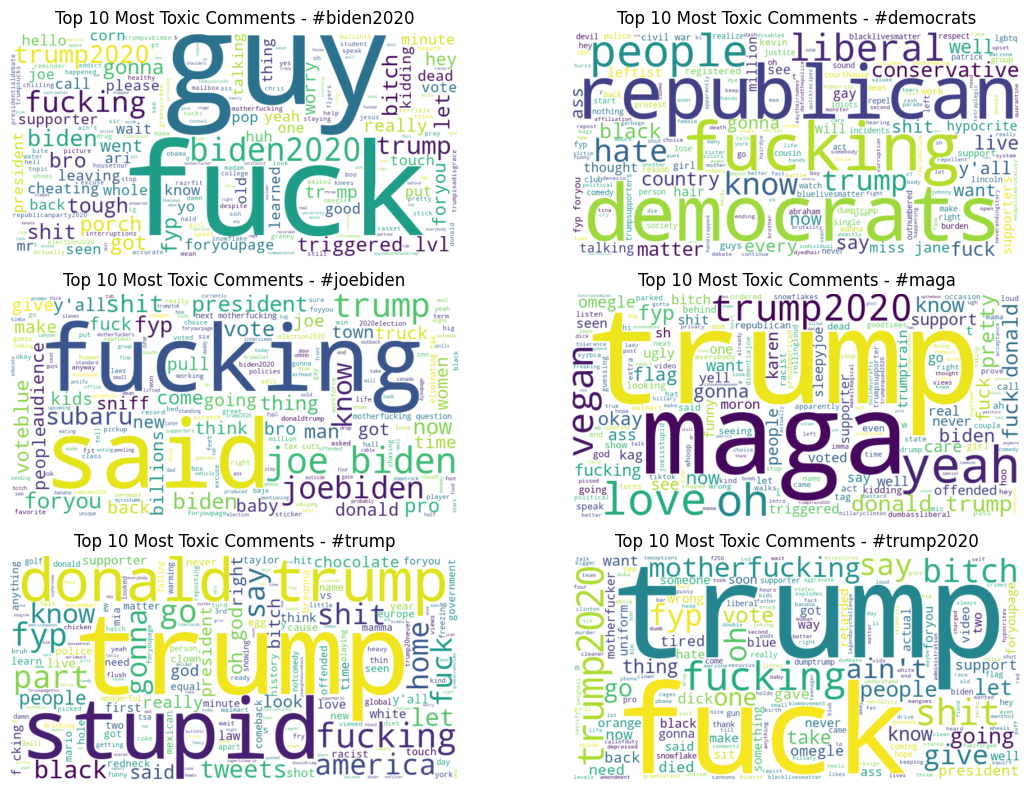

In [56]:
# Group the DataFrame by 'search_tag' and select the 'full_text' column
grouped_data = data_filtered.groupby('search_tag')['full_text']

# Calculate the number of rows and columns for the grid
n_rows = 3
n_cols = 2

# Create the figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

# Iterate over each group and generate a word cloud for the most toxic comments
for (group_name, group_data), ax in zip(grouped_data, axes.flatten()):
    # Sort the group_data by 'toxicity' in descending order
    sorted_comments = data_filtered[data_filtered['search_tag'] == group_name].sort_values('toxicity', ascending=False)
    
    # Get the most toxic comments (e.g., top 10)
    most_toxic_comments = sorted_comments.head(10)
    
    # Concatenate the comments into a single string
    text = ' '.join(most_toxic_comments['full_text'])
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Display the word cloud
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Top 10 Most Toxic Comments - #{group_name}')
    ax.axis('off')

# Remove any extra subplots
if len(grouped_data) < n_rows * n_cols:
    for j in range(len(grouped_data), n_rows * n_cols):
        fig.delaxes(axes.flatten()[j])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

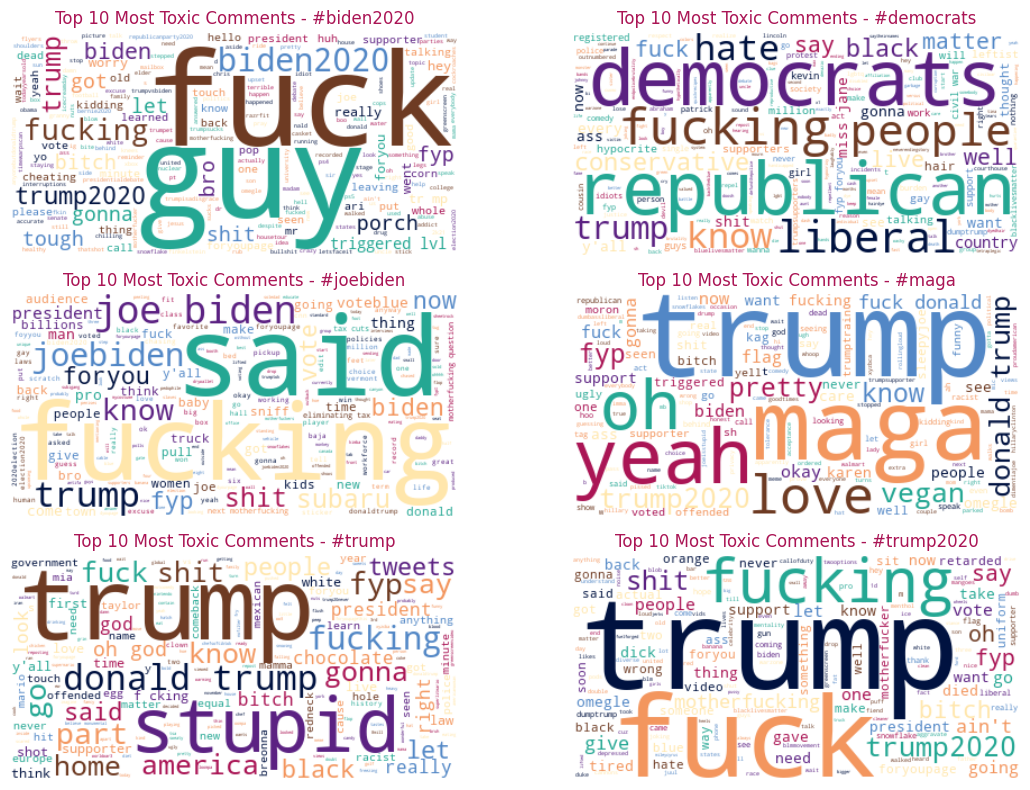

In [93]:
from wordcloud import WordCloud, STOPWORDS
import random

# Define your university colors function
def university_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # Define your university colors in hexadecimal format
    colors = ['#FFE6AB', '#F3965E', '#AA1555', '#6E3B23', '#24A793', '#5287C6', '#001240', '#5B2182']
    
    # Randomly select a color from the defined colors
    color = random.choice(colors)
    
    return color

# Create the WordCloud object with custom settings
wc = WordCloud(background_color='white', stopwords=STOPWORDS, color_func=university_color_func)

# Create the figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

# Iterate over each group and generate a word cloud for the most toxic comments
for (group_name, group_data), ax in zip(grouped_data, axes.flatten()):
    # Sort the group_data by 'toxicity' in descending order
    sorted_comments = data_filtered[data_filtered['search_tag'] == group_name].sort_values('toxicity', ascending=False)
    
    # Get the most toxic comments (e.g., top 10)
    most_toxic_comments = sorted_comments.head(10)
    
    # Concatenate the comments into a single string
    text = ' '.join(most_toxic_comments['full_text'])
    
    # Generate the word cloud
    wordcloud = wc.generate(text)
    
    # Display the word cloud
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Top 10 Most Toxic Comments - #{group_name}', color='#AA1555')
    ax.axis('off')

# Remove any extra subplots
if len(grouped_data) < n_rows * n_cols:
    for j in range(len(grouped_data), n_rows * n_cols):
        fig.delaxes(axes.flatten()[j])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


#### Likes and shares and Toxicity

In [77]:
# Set the color palette using the university theme colors
colors = ['#FFE6AB', '#F3965E', '#AA1555', '#6E3B23', '#24A793', '#5287C6', '#001240', '#5B2182']
sns.set_palette(colors)

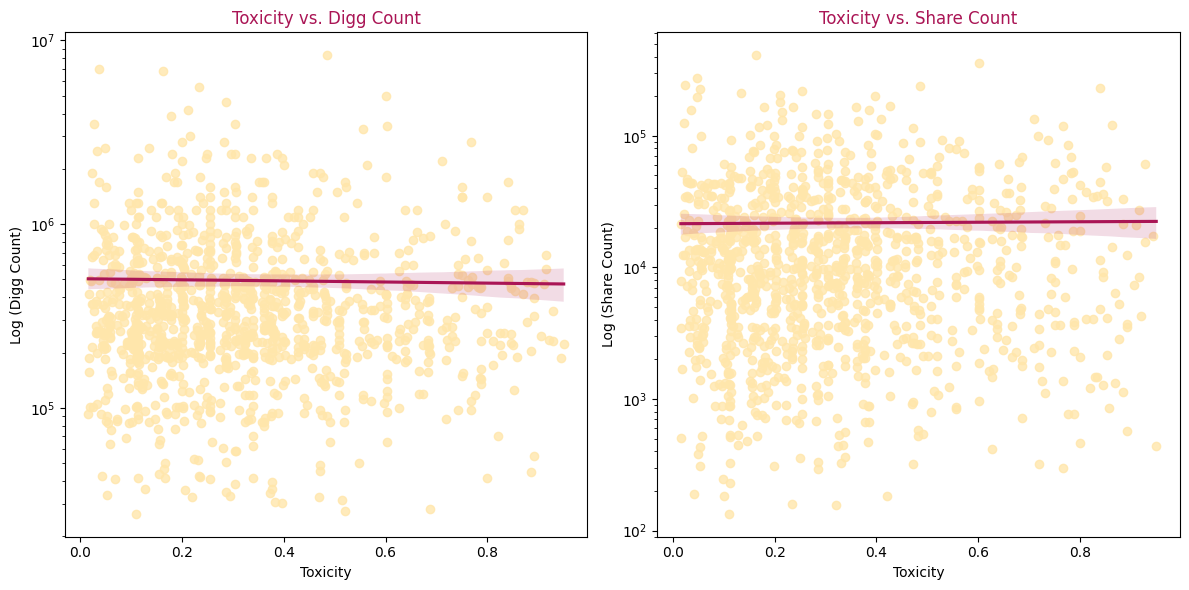

In [85]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for 'digg_count'
sns.regplot(data=data_filtered, x='toxicity', y='digg_count', line_kws={'color': '#AA1555'}, ax=axes[0])
axes[0].set_title('Toxicity vs. Digg Count', color='#AA1555')
axes[0].set_xlabel('Toxicity', color='#000000')
axes[0].set_ylabel('Log (Digg Count)', color='#000000')
axes[0].set_yscale('log')
axes[0].set_facecolor('#FFFFFF')

# Scatter plot for 'share_count'
sns.regplot(data=data_filtered, x='toxicity', y='share_count', line_kws={'color': '#AA1555'}, ax=axes[1])
axes[1].set_title('Toxicity vs. Share Count', color='#AA1555')
axes[1].set_xlabel('Toxicity', color='#000000')
axes[1].set_ylabel('Log (Share Count)', color='#000000')
axes[1].set_yscale('log')
axes[1].set_facecolor('#FFFFFF')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
data_filtered.columns

Index(['id', 'search_tag', 'create_time', 'digg_count', 'share_count',
       'comment_count', 'play_count', 'transcription', 'full_text', 'toxicity',
       'severe_toxicity', 'identity_attack', 'insult', 'profanity', 'threat'],
      dtype='object')

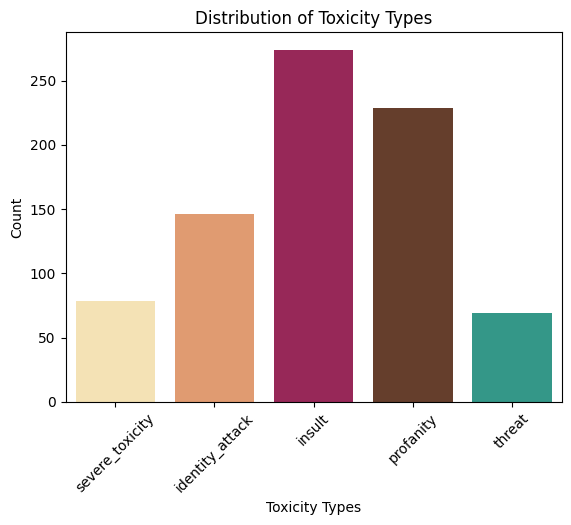

In [22]:
# Define the toxicity types
toxicity_types = ['severe_toxicity', 'identity_attack', 'insult', 'profanity', 'threat']

# Calculate the total count for each toxicity type
toxicity_counts = [data_filtered[toxicity_type].sum() for toxicity_type in toxicity_types]

# Create a DataFrame for the data
data = pd.DataFrame({'Toxicity Types': toxicity_types, 'Count': toxicity_counts})

# Set the color palette
colors = ['#FFE6AB', '#F3965E', '#AA1555', '#6E3B23', '#24A793']
sns.set_palette(colors)

# Create the stacked bar chart
sns.barplot(data=data, x='Toxicity Types', y='Count')

# Set the labels and title
plt.xlabel('Toxicity Types')
plt.ylabel('Count')
plt.title('Distribution of Toxicity Types')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

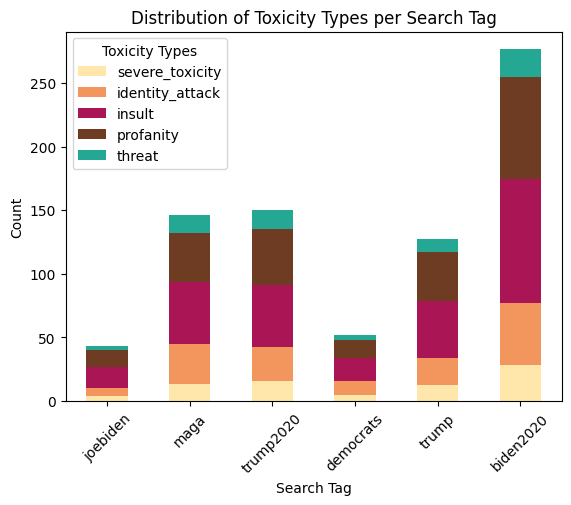

In [28]:
# Define the toxicity types
toxicity_types = ['severe_toxicity', 'identity_attack', 'insult', 'profanity', 'threat']

# Calculate the total count for each toxicity type per search tag
toxicity_counts = []
for tag in data_filtered['search_tag'].unique():
    counts = [data_filtered[data_filtered['search_tag'] == tag][toxicity_type].sum() for toxicity_type in toxicity_types]
    toxicity_counts.append(counts)

# Create a DataFrame for the data
data = pd.DataFrame(toxicity_counts, columns=toxicity_types)
data['search_tag'] = data_filtered['search_tag'].unique()

# Set the color palette
colors = ['#FFE6AB', '#F3965E', '#AA1555', '#6E3B23', '#24A793']
sns.set_palette(colors)

# Set the plot size
plt.figure(figsize=(12, 8))

# Plot the stacked bar chart
ax = data.set_index('search_tag')[toxicity_types].plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Search Tag')
plt.ylabel('Count')
plt.title('Distribution of Toxicity Types per Search Tag')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Toxicity Types')

# Display the plot
plt.show()